In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.layers import Convolution2D
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential 

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)


Found 16011 files belonging to 10 classes.


In [4]:
class_names= dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

501

2024-08-21 12:23:56.633230: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


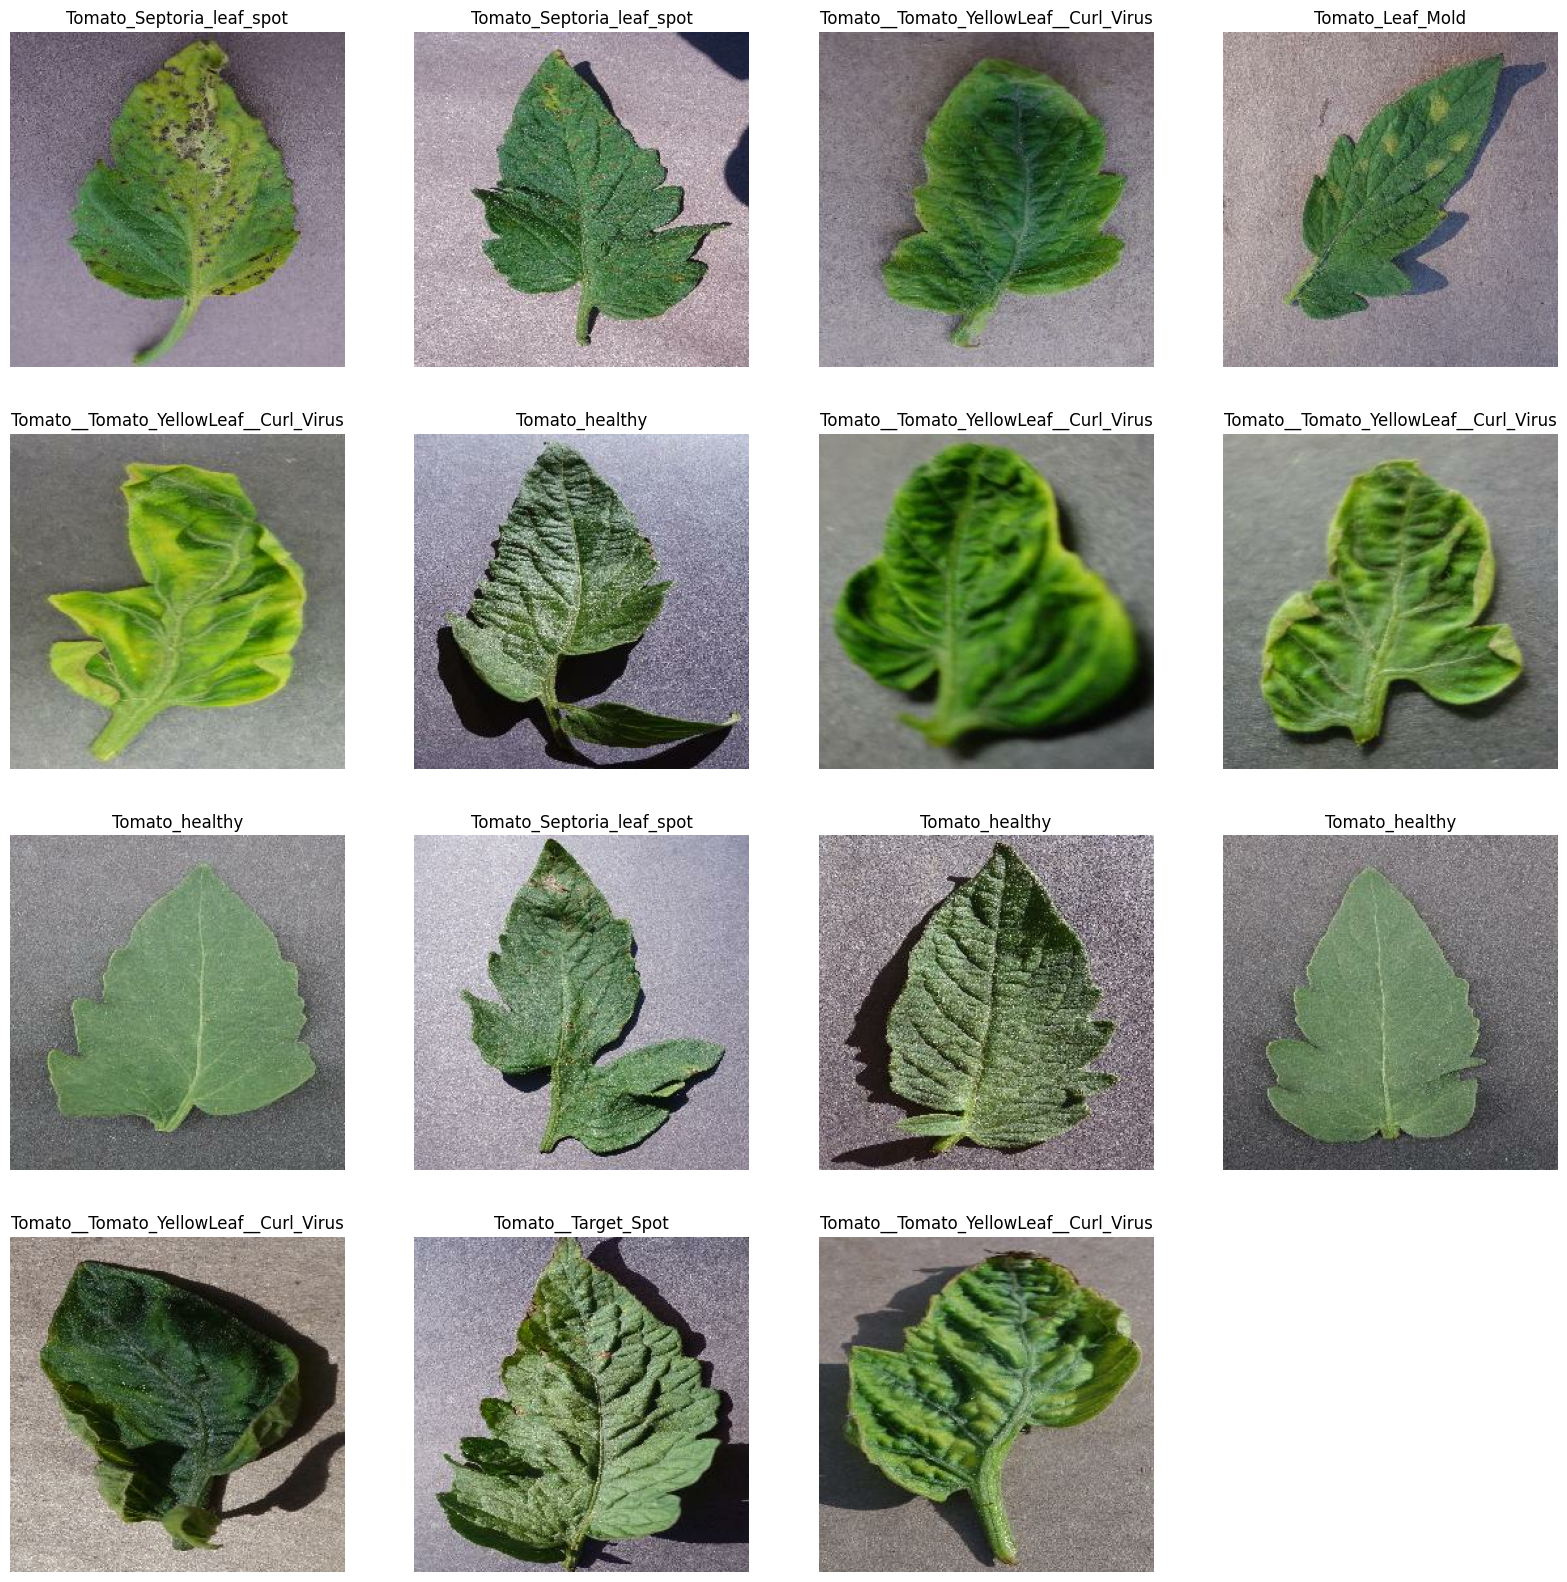

In [6]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [7]:
len(dataset)

501

In [8]:
train_size = 0.8
len(dataset)*train_size

400.8

In [9]:
train_ds = dataset.take(400)
len(train_ds)

400

In [10]:
test_ds = dataset.skip(400)
len(test_ds)

101

In [11]:
val_size = 0.1
len(dataset)*val_size

50.1

In [12]:
ds_val = dataset.take(50)
len(ds_val)

50

In [13]:
test_ds = test_ds.skip(50)
len(test_ds)

51

In [14]:
def get_dataset(ds, train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    test_size = int(ds_size * test_split)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
    


In [15]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [16]:
len(train_ds)

400

In [17]:
len(val_ds)

50

In [18]:
len(test_ds)

51

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
image_size = 256

In [21]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)])

In [80]:
image_size = 256
CHANNELS = 3
EPOCHS = 30
BATCH_SIZE = 32

In [95]:
input_shape = (image_size,image_size, CHANNELS)
n_classes=10
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_19 (Sequential)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 859,850 (3.28 MB)

 Trainable params: 859,850 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 124s 310ms/step - accuracy: 0.4157 - loss: 1.6665 - val_accuracy: 0.6750 - val_loss: 0.9263
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 134s 336ms/step - accuracy: 0.6970 - loss: 0.8701 - val_accuracy: 0.7406 - val_loss: 0.7147
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 143s 357ms/step - accuracy: 0.7939 - loss: 0.5924 - val_accuracy: 0.7581 - val_loss: 0.7519
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 159s 399ms/step - accuracy: 0.8209 - loss: 0.5063 - val_accuracy: 0.8244 - val_loss: 0.5031
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 155s 389ms/step - accuracy: 0.8492 - loss: 0.4293 - val_accuracy: 0.8319 - val_loss: 0.4672
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 172s 430ms/step - accuracy: 0.8691 - loss: 0.3782 - val_accuracy: 0.8569 - val_loss: 0.3930
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 173s 432ms/step - accuracy: 0.8926 - loss: 0.3042 - val_accuracy: 0.8188 - val_loss: 0.5016
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 216s 540ms/step - accuracy: 0.9042 -

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss , label = 'Training loss')
plt.plot(range(EPOCHS) , val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

In [ ]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy() 
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label", class_names[first_label]) 
    model_pred = model.predict(image_batch)
    print("predicted label" ,class_names[np.argmax(model_pred[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis("off")
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"actual: {actual_class},\n Predicted :{predicted_class}\n Confidence: {confidence}%")
        